# Segmentation of Satellitle Images via Color Distributions on Pixels
## Surya Keswani
### sukeswan@ucsc.edu


To run notebook, pass in 3 parameters into the main function. 

1. Path of image
2. Light color threshold to build segmentation mask with 
3. Dark color to build segmentation mask with 

The main function has an example of this. Look at code comments to understand each function.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

print("All libraries imported.")

All libraries imported.


In [2]:
def read_image(PATH): # read in am image based on the provided path
    
    image = cv2.imread(PATH)
    return image

print("read_image() function compiled.")

read_image() function compiled.


In [3]:
def process_image(old_img):  # process the image 

    image = cv2.cvtColor(old_img,cv2.COLOR_BGR2RGB) # convert image from default BGR format to RGB Format
    plt.imshow(image)                               # this conversion will now make the image look normal 
    plt.show()

    ######### rgb scatter plot #########            # split image into each of its color channels
    r, g, b = cv2.split(image)                      
    fig = plt.figure()                              # built scatter plot on each axis of color
    axis = fig.add_subplot(1, 1, 1, projection="3d")

    pixel_colors = image.reshape((np.shape(image)[0]*np.shape(image)[1], 3)) 
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()   

    axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")
    plt.show()
    
    return image

print("process_image() function compiled.")

process_image() function compiled.


In [4]:
def hsv(image):      # process image into hsv format 
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    h, s, v = cv2.split(hsv_image)      #split image into each of its color channels
    fig = plt.figure()                  # built scatter plot on each axis of color
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    
    pixel_colors = image.reshape((np.shape(image)[0]*np.shape(image)[1], 3))
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()
    
    axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
    axis.set_xlabel("Hue")
    axis.set_ylabel("Saturation")
    axis.set_zlabel("Value")
    plt.show()
    
    return hsv_image

print("hsv() function compiled.")

hsv() function compiled.


In [5]:
def results(original, hsv_image, light, dark):   # give thresholds to build mask along with hsv image 

    mask = cv2.inRange(hsv_image, light, dark)
    result = cv2.bitwise_and(original, original, mask=mask)     #show resulting masks

    plt.subplot(1, 2, 1)
    plt.imshow(mask, cmap="gray")
    plt.subplot(1, 2, 2)
    plt.imshow(result)
    plt.show()
    
print("results() function compiled.")

results() function compiled.


In [6]:
def main(PATH, light, dark): # main fcuntion call 
    
    original = read_image(PATH)
    converted = process_image(original)
    hsv_image = hsv(converted)
    results (converted, hsv_image, light, dark)
    
print("main() function compiled.")

main() function compiled.


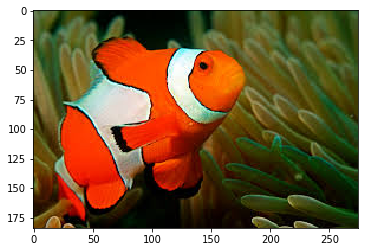

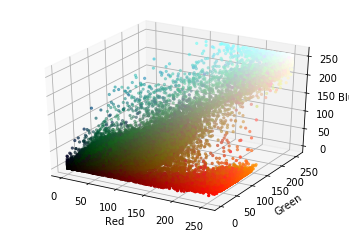

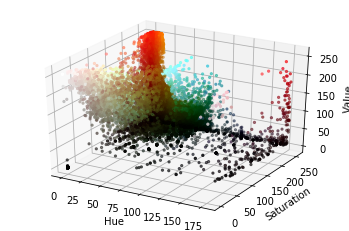

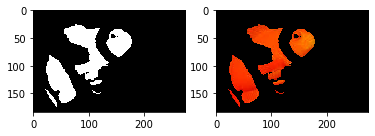

In [7]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)
light_gray = (120,100,100)
dark_gray = (149,100,20)

main("/Users/sukeswan/Desktop/nemo0.jpg", light_orange, dark_orange)